In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# librairies pour construire les modèles
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import random
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/Users/macbook/Desktop/pre_522days_train_data.csv', header=0)

In [4]:
df.shape

(522, 21)

In [5]:
df.head(5)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [7]:
# Création des colonnes "Year" et "Month"
df["Year"] = pd.to_datetime(df['Date'], dayfirst=True).dt.year
df["Month"] = pd.to_datetime(df['Date'], dayfirst=True).dt.month

In [8]:
df.head(10)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,2,178,66,64,11,29,87,68,2005,1
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,29,141,48,29,58,53,68,26,2005,1
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,4,157,33,33,24,18,62,44,2005,1
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,14,107,66,50,25,21,43,31,2005,1
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,11,124,63,56,7,47,85,60,2005,1
5,07/02/2005,174,76,77,152,189,26,74,181,157,...,26,146,59,54,27,54,48,60,2005,2
6,14/02/2005,153,103,54,192,148,65,100,118,129,...,10,119,104,85,20,32,153,70,2005,2
7,21/02/2005,115,74,64,174,140,56,111,175,138,...,21,178,70,75,5,66,149,54,2005,2
8,28/02/2005,119,86,57,171,90,65,118,105,194,...,12,112,116,76,22,45,102,42,2005,2
9,07/03/2005,114,81,129,217,167,64,93,154,119,...,6,130,68,59,31,85,96,54,2005,3


In [9]:
df.isnull().sum()

Date        0
BUDAPEST    0
BARANYA     0
BACS        0
BEKES       0
BORSOD      0
CSONGRAD    0
FEJER       0
GYOR        0
HAJDU       0
HEVES       0
JASZ        0
KOMAROM     0
NOGRAD      0
PEST        0
SOMOGY      0
SZABOLCS    0
TOLNA       0
VAS         0
VESZPREM    0
ZALA        0
Year        0
Month       0
dtype: int64

In [10]:
n = pd.DataFrame(df, columns=['BUDAPEST',"BARANYA",'BACS','BEKES','BORSOD','CSONGRAD',
                              'FEJER','GYOR','HAJDU','HEVES','JASZ','KOMAROM','NOGRAD',
                              'PEST','SOMOGY','SZABOLCS','TOLNA','VAS','VESZPREM','ZALA','Year', 'Month'])[(df.Year ==2005)]

# Analyse exploratoire des données

In [12]:
# Nombre de cas par ville et par an
df1 = df.groupby('Year').sum()
df1

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Month
Year,,,,,,,,,,,,,,,,,,,,,
2005,4562,2051,2766,3544,4027,1431,2468,3524,4122,1841,...,2591,852,4707,1694,1986,955,2099,2916,1591,336
2006,6498,1863,1969,1191,2173,2703,1603,1977,1762,1310,...,1434,1415,4848,2174,1636,1919,1623,3679,1648,335
2007,6311,2345,2197,2780,3715,1614,1949,2672,2863,2973,...,1500,2039,5943,1507,2036,1114,760,2270,1236,346
2008,4441,1815,1711,1451,3015,1222,2353,2453,2287,1219,...,1479,1135,3521,1252,1963,835,610,1784,530,342
2009,5527,1591,1607,1409,3086,2584,1053,1996,3386,1614,...,1394,1255,4304,1476,1441,1332,2059,1232,909,340
2010,5222,2656,2803,901,2001,1119,1722,1863,2034,916,...,1555,675,5288,1299,921,1119,672,2504,998,339
2011,5404,1272,1616,1477,3276,1995,1789,1737,2122,1778,...,1360,742,4522,1109,2219,767,905,2379,1296,336
2012,5353,907,1927,648,3205,1151,2160,2354,1880,1374,...,816,1252,3907,1464,1010,397,1144,1487,802,346
2013,5157,2221,951,864,2575,1097,1039,1696,2367,1144,...,612,1248,4608,1649,1428,1579,1001,1427,475,344


## Visualisations des tendances de l'épidémie de chaque ville principale d'Hongrie

<AxesSubplot:xlabel='Month', ylabel='BUDAPEST'>

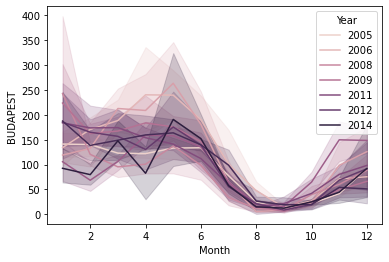

In [10]:
sns.lineplot(x='Month', y="BUDAPEST",hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='BARANYA'>

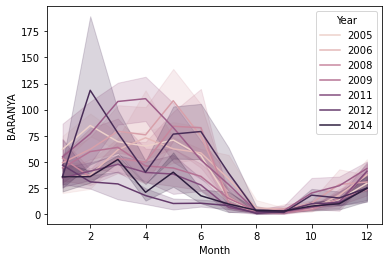

In [11]:
sns.lineplot(x='Month', y="BARANYA",hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='BACS'>

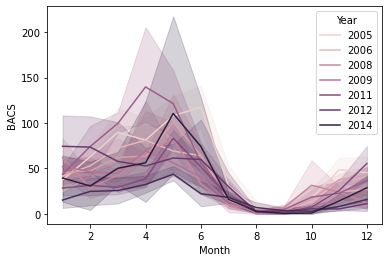

In [12]:
sns.lineplot(x='Month', y='BACS',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='BEKES'>

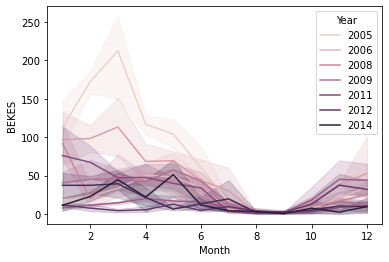

In [13]:
sns.lineplot(x='Month', y='BEKES',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='BORSOD'>

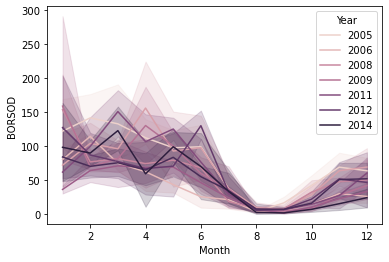

In [14]:
sns.lineplot(x='Month', y='BORSOD',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='CSONGRAD'>

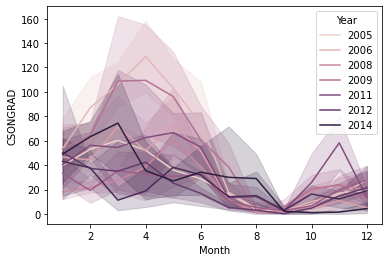

In [15]:
sns.lineplot(x='Month', y='CSONGRAD',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='FEJER'>

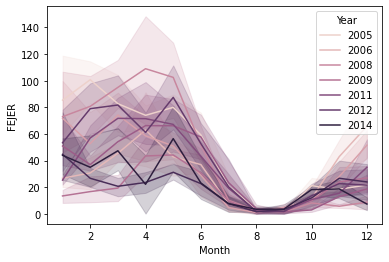

In [16]:
sns.lineplot(x='Month', y='FEJER',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='GYOR'>

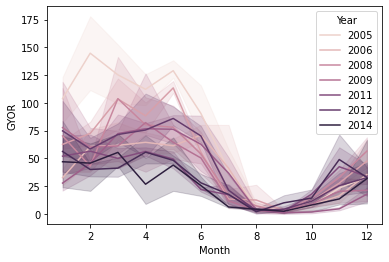

In [17]:
sns.lineplot(x='Month', y='GYOR',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='HAJDU'>

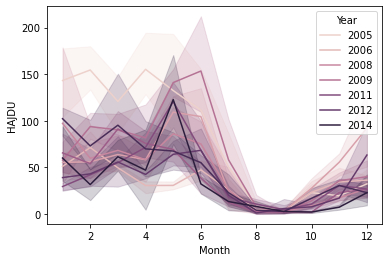

In [18]:
sns.lineplot(x='Month', y='HAJDU',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='HEVES'>

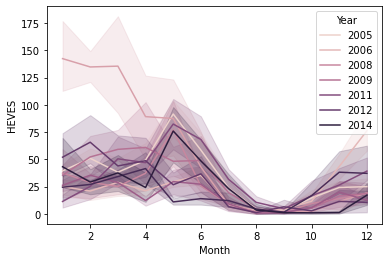

In [19]:
sns.lineplot(x='Month', y='HEVES',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='KOMAROM'>

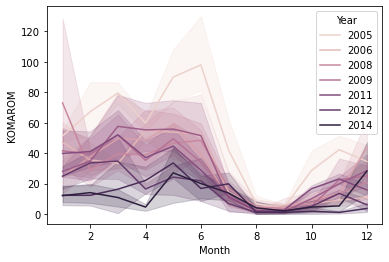

In [20]:
sns.lineplot(x='Month', y='KOMAROM',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='NOGRAD'>

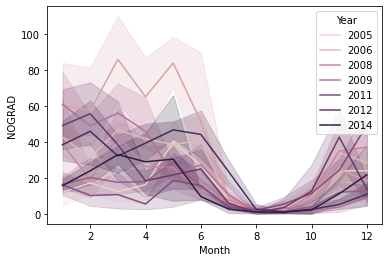

In [21]:
sns.lineplot(x='Month', y='NOGRAD',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='PEST'>

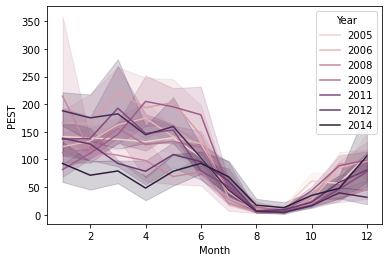

In [22]:
sns.lineplot(x='Month', y='PEST',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='SOMOGY'>

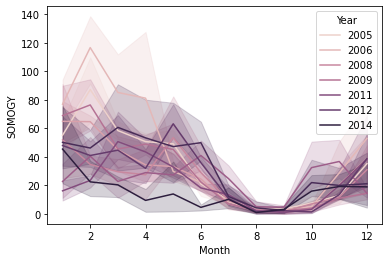

In [23]:
sns.lineplot(x='Month', y='SOMOGY',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='SZABOLCS'>

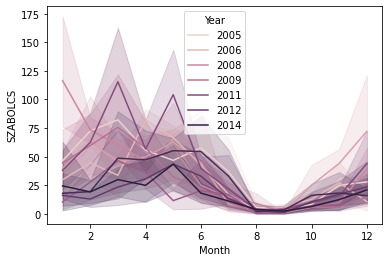

In [24]:
sns.lineplot(x='Month', y='SZABOLCS',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='TOLNA'>

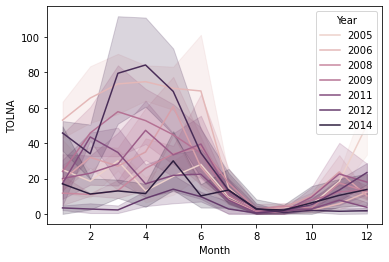

In [25]:
sns.lineplot(x='Month', y='TOLNA',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='VAS'>

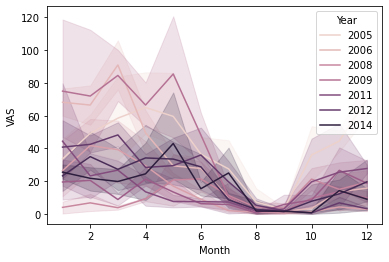

In [26]:
sns.lineplot(x='Month', y='VAS',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='VESZPREM'>

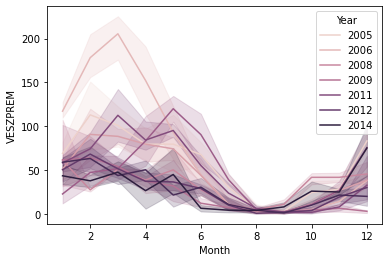

In [27]:
sns.lineplot(x='Month', y='VESZPREM',hue="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='ZALA'>

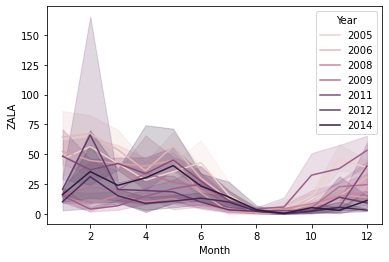

In [28]:
sns.lineplot(x='Month', y='ZALA',hue="Year", data=df)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

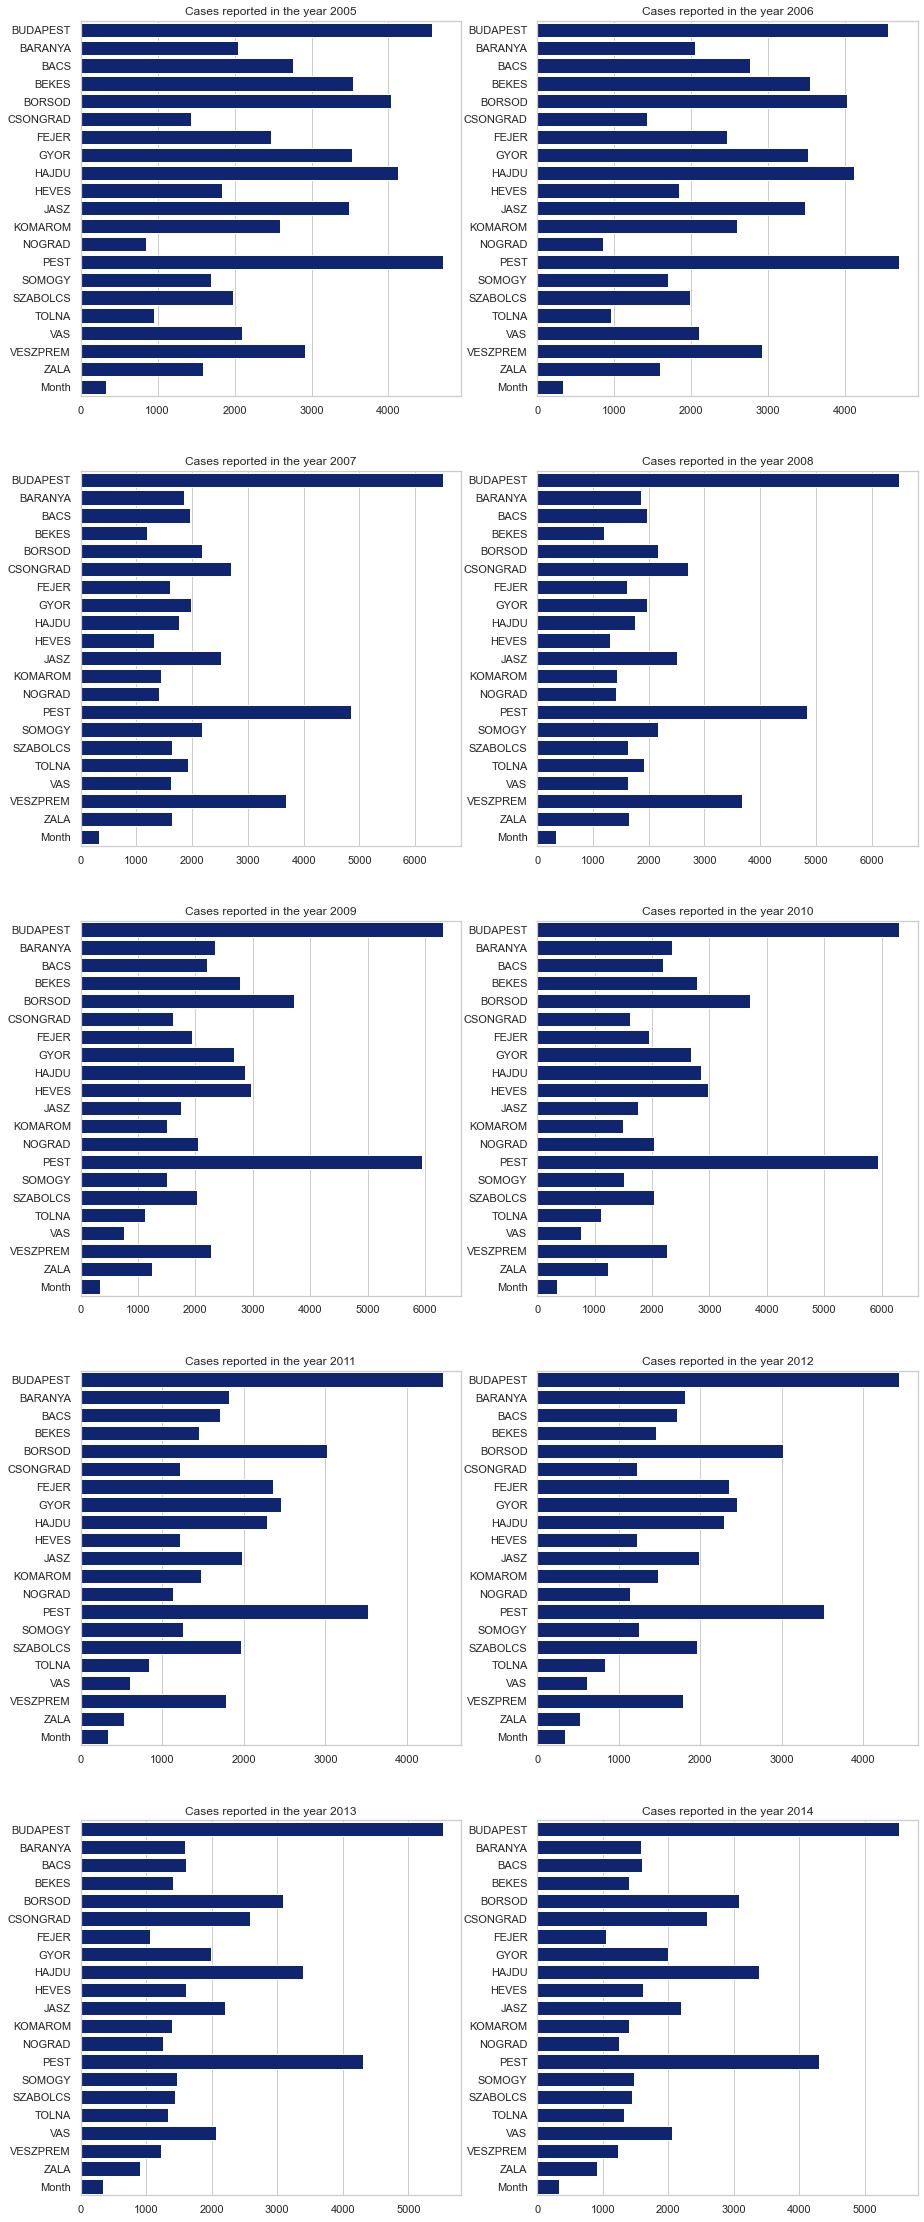

In [15]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("dark")
k = 0
f, axes = plt.subplots(5,2, figsize=(15,40))
for i in range(len(df1)//2):
    for j in range(2):
        year = df1.index[k]
        regions = list(df1.iloc[i].index)
        cases = list(df1.iloc[i].values)
   
        sns.barplot(cases, regions, color="b", ax = axes[i,j])
        axes[i,j].set_title(f"Cases reported in the year" + ' ' + str(year))
        k = k + 1

Pour les cas de varicelle en Hongrie pour les années (2005 - 2014), BUDAPEST a rapporté le plus grand nombre de cas pour les années (2007 - 2014) et PEST a enregistré le plus grand nombre de cas pour les années (2005 - 2006).

# Transformation de dataset

In [32]:
# transformer un ensemble de données chronologiques en un ensemble de données d'apprentissage supervisé
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 
    df = pd.DataFrame(data)
    # print(df)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # concaténer n_in et n_out
    agg = pd.concat(cols, axis=1)
    # print(agg)

    # enlever les colonnes nulles
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# spéparer l'apprentissage en deux parties train/test
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# XGBoost Model

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=1.5,predicted=0.5
>expected=-0.3,predicted=0.5


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.7,predicted=0.9
>expected=-0.3,predicted=0.6
>expected=-1.2,predicted=1.2
>expected=-0.4,predicted=1.8
>expected=3.8,predicted=-0.7
>expected=1.0,predicted=0.2
>expected=0.3,predicted=1.0
>expected=1.8,predicted=1.4
>expected=-0.2,predicted=1.2
>expected=1.1,predicted=1.0
>expected=0.5,predicted=0.2
>expected=0.1,predicted=1.1
>expected=-0.4,predicted=0.4
>expected=-0.3,predicted=0.3
>expected=-0.8,predicted=-0.5
>expected=-0.8,predicted=-0.8
>expected=-0.8,predicted=-0.7
>expected=-1.2,predicted=-0.8
>expected=-1.2,predicted=-0.9
>expected=-1.2,predicted=-1.2
>expected=-1.3,predicted=-1.2
>expected=-1.2,predicted=-1.1
>expected=-1.2,predicted=-1.1
>expected=-1.1,predicted=-1.2
>expected=-1.1,predicted=-1.2
>expected=-1.1,predicted=-1.1
>expected=-1.1,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-1.1
>expected=-0.8,predicted=-0.7
>expected=-0.9,predicted=-0.7
>expected=-0.2,predicted=-0.8
>expected=-1.1,predicted=-0.5
>expected=-0.1,predicted=-0.4
>

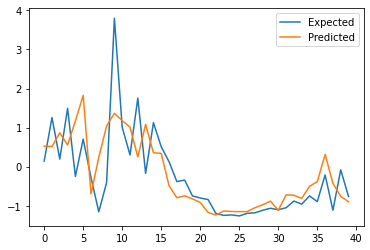

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.5,predicted=1.0
>expected=-0.4,predicted=1.3


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.1,predicted=0.8
>expected=-0.4,predicted=0.7
>expected=-0.7,predicted=0.5
>expected=1.0,predicted=-0.6
>expected=0.0,predicted=0.4
>expected=-0.3,predicted=0.7
>expected=0.0,predicted=0.0
>expected=-0.5,predicted=0.5
>expected=-0.9,predicted=-0.0
>expected=-0.2,predicted=-0.3
>expected=-0.4,predicted=-0.3
>expected=-0.5,predicted=-0.3
>expected=-0.2,predicted=-0.1
>expected=-0.9,predicted=-0.3
>expected=-0.8,predicted=-0.9
>expected=-1.1,predicted=-0.3
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-0.9,predicted=-0.7
>expected=-1.0,predicted=-0.9
>expected=-1.1,predicted=-0.8
>expected=-1.0,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-0.7,predicted=-0.9
>expected=-1.0,predicted=-0.8
>expected=-0.7,predicted=-1.0
>expected=-0.8,predicted=-0.7
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.7
>expected=-0.6,predicted=-1.0
>expected=-0.6,predicted=-0.8
>expected=-0.7,predi

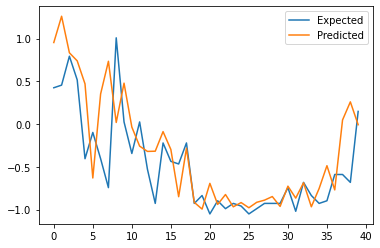

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.8,predicted=1.1
>expected=3.3,predicted=-0.1


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.0,predicted=1.2
>expected=-0.3,predicted=0.1
>expected=-0.9,predicted=0.9
>expected=0.1,predicted=-0.5
>expected=6.4,predicted=-0.3
>expected=0.3,predicted=-0.0
>expected=1.2,predicted=-0.6
>expected=1.3,predicted=0.6
>expected=-1.0,predicted=1.0
>expected=3.8,predicted=0.2
>expected=1.3,predicted=2.6
>expected=-0.3,predicted=1.5
>expected=-0.5,predicted=2.2
>expected=-0.3,predicted=0.4
>expected=-0.7,predicted=0.9
>expected=-0.7,predicted=-0.6
>expected=-0.8,predicted=-0.7
>expected=-1.0,predicted=-0.7
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.1
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-0.8,predicted=-0.9
>expected=-0.7,predicted=-0.9
>expected=-0.3,predicted=-0.8
>expected=-0.6,predicted=-0.5
>expected=0.1,predicted=-0.1


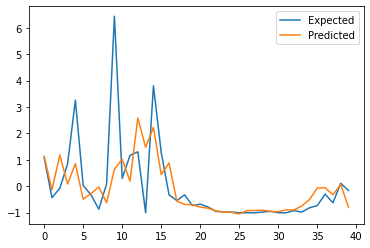

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.7,predicted=0.4


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.1,predicted=0.3
>expected=0.7,predicted=0.4
>expected=-0.6,predicted=0.4
>expected=-0.8,predicted=-0.2
>expected=0.8,predicted=-0.6
>expected=0.9,predicted=-0.1
>expected=-0.5,predicted=-0.4
>expected=1.2,predicted=0.6
>expected=-0.1,predicted=-0.3
>expected=-0.6,predicted=0.2
>expected=-0.5,predicted=0.8
>expected=-0.6,predicted=-0.5
>expected=-0.7,predicted=-0.3
>expected=-0.6,predicted=-0.4
>expected=-0.7,predicted=-0.6
>expected=-0.7,predicted=-0.6
>expected=-0.6,predicted=-0.5
>expected=-0.8,predicted=-0.7
>expected=-0.7,predicted=-0.7
>expected=-0.7,predicted=-0.6
>expected=-0.6,predicted=-0.7
>expected=-0.8,predicted=-0.7
>expected=-0.8,predicted=-0.7
>expected=-0.7,predicted=-0.7
>expected=-0.7,predicted=-0.8
>expected=-0.8,predicted=-0.6
>expected=-0.7,predicted=-0.7
>expected=-0.7,predicted=-0.8
>expected=-0.1,predicted=-0.7
>expected=-0.7,predicted=-0.6
>expected=-0.8,predicted=-0.6
>expected=-0.8,predicted=-0.7
>expected=-0.6,predicted=-0.7
>expected=-0.7,predi

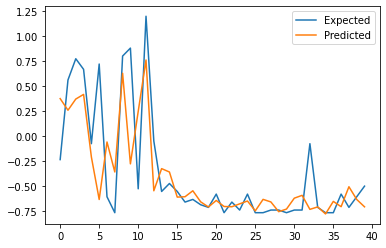

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.3,predicted=1.6


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=1.0,predicted=0.6
>expected=1.0,predicted=0.6
>expected=-0.7,predicted=0.6
>expected=-1.1,predicted=0.4
>expected=0.4,predicted=0.0
>expected=1.0,predicted=-0.8
>expected=1.5,predicted=-0.3
>expected=0.4,predicted=0.7
>expected=2.0,predicted=0.4
>expected=-0.8,predicted=1.2
>expected=0.1,predicted=0.5
>expected=1.0,predicted=1.5
>expected=-1.0,predicted=-0.2
>expected=0.5,predicted=-0.0
>expected=-0.9,predicted=1.4
>expected=-0.8,predicted=-0.7
>expected=-0.7,predicted=0.5
>expected=-1.0,predicted=-0.9
>expected=-1.1,predicted=-0.5
>expected=-1.1,predicted=-0.6
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.1
>expected=-1.0,predicted=-1.1
>expected=-0.9,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.8
>expected=-0.6,predicted=-0.8
>expected=-0.9,predicted=-0.8
>expected=-1.1,predicted=-1.0
>e

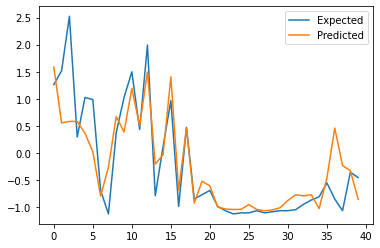

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=3.3,predicted=0.5
>expected=0.9,predicted=0.9


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.8,predicted=2.0
>expected=-0.3,predicted=-0.1
>expected=-0.8,predicted=-0.0
>expected=0.4,predicted=-0.4
>expected=-0.3,predicted=0.5
>expected=-0.0,predicted=-0.7
>expected=-0.5,predicted=-0.2
>expected=1.2,predicted=0.8
>expected=-0.1,predicted=0.3
>expected=0.1,predicted=0.8
>expected=-0.8,predicted=-0.5
>expected=-0.0,predicted=0.0
>expected=-0.7,predicted=0.0
>expected=-0.4,predicted=-0.3
>expected=-0.9,predicted=0.3
>expected=1.8,predicted=0.2
>expected=0.8,predicted=0.2
>expected=-0.2,predicted=0.6
>expected=0.1,predicted=-0.3
>expected=-0.9,predicted=0.2
>expected=-0.9,predicted=0.8
>expected=-0.9,predicted=0.1
>expected=-0.9,predicted=-0.9
>expected=-0.7,predicted=-0.9
>expected=-0.8,predicted=-0.5
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.7
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.9
>

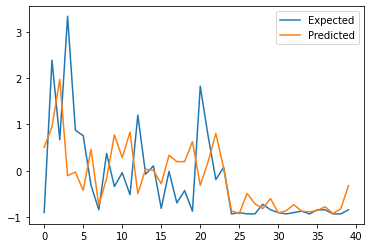

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.4,predicted=0.1
>expected=0.2,predicted=1.3


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.4,predicted=0.2
>expected=-1.0,predicted=0.3
>expected=-1.1,predicted=-0.9
>expected=1.7,predicted=-0.9
>expected=0.3,predicted=0.4
>expected=-0.4,predicted=1.3
>expected=1.3,predicted=0.5
>expected=-0.4,predicted=0.5
>expected=-0.8,predicted=0.9
>expected=0.9,predicted=-0.4
>expected=-0.6,predicted=0.3
>expected=-0.6,predicted=0.2
>expected=-0.6,predicted=-0.5
>expected=-0.7,predicted=0.4
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-0.7
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-0.8,predicted=-1.0
>expected=-0.5,predicted=-0.7
>expected=-0.4,predicted=-0.6
>expected=-0.4,predicted=-0.2
>expected=-0.6,predicted=-0.4
>expected=-0.5,predicted=-0.1
>expected=-0.4,predicted=-0.1
>expected=-0.2,predicted=-0.4
>expected=-0.8,predicted=-0.4
>expected=-0.6,predicted=

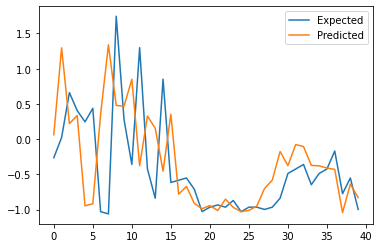

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.2,predicted=0.8


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.6,predicted=0.3
>expected=-0.7,predicted=0.8
>expected=-0.5,predicted=-0.1
>expected=-1.0,predicted=-0.5
>expected=-0.2,predicted=-0.7
>expected=1.3,predicted=-0.7
>expected=-0.8,predicted=0.1
>expected=-0.0,predicted=0.6
>expected=-0.2,predicted=-0.0
>expected=-0.1,predicted=0.9
>expected=-0.6,predicted=-0.2
>expected=-0.9,predicted=-0.2
>expected=-0.4,predicted=-0.9
>expected=-1.0,predicted=-0.7
>expected=-1.0,predicted=-0.4
>expected=-1.0,predicted=-1.1
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-1.1
>expected=-1.0,predicted=-0.9
>expected=-1.1,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-1.2,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.1,predicted=-1.0
>expected=-1.0,predicted=-1.1
>expected=-1.1,predicted=-0.9
>expected=-1.1,predicted=-1.0
>expected=-0.7,predicted=-1.1
>expected=-1.1,predicted=-0.7
>expected=-0.8,predicted=-0.9
>expected=-0.8,predicted=-0.8
>expected=-1.0,predicted=-1.0
>expected=-0.8,predicted=-1.0
>expected=-0.5,pr

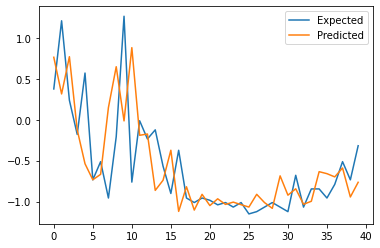

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.0,predicted=1.3
>expected=0.9,predicted=1.2


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=1.0,predicted=0.6
>expected=-0.9,predicted=0.4
>expected=-1.1,predicted=0.9
>expected=1.0,predicted=-0.1
>expected=2.6,predicted=0.1
>expected=2.9,predicted=0.7
>expected=0.2,predicted=1.8
>expected=-0.2,predicted=1.7
>expected=-0.4,predicted=1.3
>expected=-0.1,predicted=-0.6
>expected=-0.2,predicted=-0.3
>expected=-0.8,predicted=0.1
>expected=-0.7,predicted=-0.3
>expected=-0.5,predicted=-0.4
>expected=-0.9,predicted=-0.3
>expected=-1.0,predicted=-0.6
>expected=-0.7,predicted=-0.7
>expected=-0.9,predicted=-0.4
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.1
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.9
>expected=-0.8,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.9
>expected=-0.7,predicted

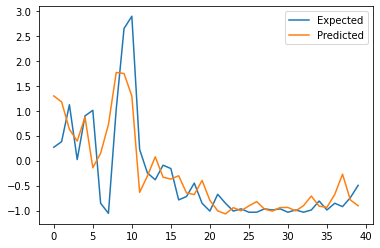

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=1.1,predicted=0.3


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.4,predicted=0.0
>expected=0.1,predicted=0.8
>expected=-0.4,predicted=-0.0
>expected=-0.8,predicted=0.7
>expected=0.0,predicted=-0.9
>expected=1.5,predicted=0.2
>expected=2.1,predicted=-0.2
>expected=2.2,predicted=0.3
>expected=0.3,predicted=2.2
>expected=1.3,predicted=1.2
>expected=1.5,predicted=0.5
>expected=0.6,predicted=-0.4
>expected=-0.6,predicted=1.3
>expected=0.3,predicted=1.0
>expected=0.1,predicted=0.2
>expected=-0.6,predicted=0.0
>expected=-0.7,predicted=-0.1
>expected=-0.9,predicted=-0.7
>expected=-0.6,predicted=-0.6
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-1.0
>expected=-0.8,predicted=-0.8
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.8,predicted=-0.8
>expected=-0.9,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.7
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.7
>exp

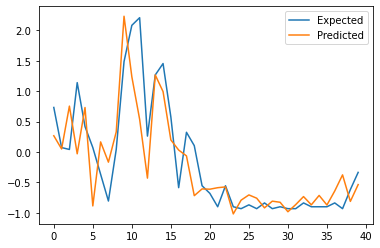

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.1,predicted=0.1


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.7,predicted=0.5
>expected=0.8,predicted=0.8
>expected=-0.6,predicted=0.7
>expected=-0.8,predicted=0.2
>expected=2.1,predicted=-0.6
>expected=2.6,predicted=0.4
>expected=1.8,predicted=0.8
>expected=1.7,predicted=1.3
>expected=1.2,predicted=2.7
>expected=-0.7,predicted=1.2
>expected=2.4,predicted=1.2
>expected=0.1,predicted=1.0
>expected=0.1,predicted=0.4
>expected=-0.2,predicted=0.0
>expected=-0.9,predicted=0.5
>expected=0.3,predicted=-0.2
>expected=-0.4,predicted=0.1
>expected=-0.7,predicted=-0.4
>expected=-0.9,predicted=-0.0
>expected=-0.8,predicted=-0.9
>expected=-1.1,predicted=-1.1
>expected=-0.8,predicted=-1.0
>expected=-1.0,predicted=-0.4
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.8
>expected=-0.4,predicted=-0.8
>expected=-0.6,predicted=-0.6
>expected=-0.7,predicted=-0.4
>expected=-0.8,predicted=-0.3
>expected=-0.8,predicted=-0.8
>expected=-0.7,predicted=-0.8
>expected=-0.7,predicted=-0.4
>expected=-0.5,predicted=-0.7
>expec

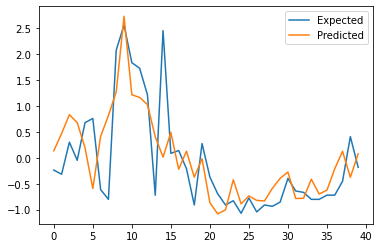

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.6,predicted=-0.2


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.8,predicted=-0.6
>expected=-0.8,predicted=-0.8
>expected=-1.0,predicted=-0.6
>expected=-0.8,predicted=-0.7
>expected=-0.4,predicted=-0.7
>expected=0.5,predicted=-0.4
>expected=1.0,predicted=-0.8
>expected=-0.9,predicted=0.2
>expected=0.1,predicted=0.7
>expected=-0.3,predicted=1.2
>expected=0.0,predicted=0.3
>expected=0.1,predicted=-0.2
>expected=-1.0,predicted=-0.1
>expected=-0.4,predicted=-0.8
>expected=-0.3,predicted=-0.6
>expected=-0.5,predicted=-0.3
>expected=-0.8,predicted=-1.0
>expected=-0.6,predicted=-0.5
>expected=-0.8,predicted=-0.6
>expected=-1.0,predicted=-0.7
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-0.8,predicted=-1.0
>expected=-0.9,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-0.6,predicted=-0.8
>expected=-1.0,predicted=-0.7
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-0.9
>expected=-0.6,predicted=-0.9
>expected=-0.7,predicted=-0.9
>expected=-1.0,pred

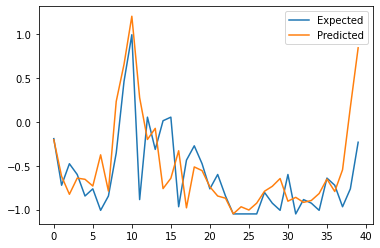

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.8,predicted=0.9
>expected=1.1,predicted=0.0


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=1.0,predicted=0.4
>expected=0.2,predicted=1.3
>expected=-1.0,predicted=1.9
>expected=-0.4,predicted=0.5
>expected=2.8,predicted=-0.4
>expected=0.1,predicted=1.5
>expected=-0.9,predicted=1.2
>expected=-0.3,predicted=0.1
>expected=-0.6,predicted=0.6
>expected=-0.6,predicted=-0.2
>expected=-0.6,predicted=-0.3
>expected=-0.6,predicted=-0.5
>expected=-0.9,predicted=-0.8
>expected=-0.7,predicted=-1.1
>expected=-0.8,predicted=-0.5
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-1.0
>expected=-0.9,predicted=-1.1
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-1.0
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-0.8
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-1.0
>expected=-0.7,predicted=-0.7
>expected=-0.8,predicted=-0.8
>expected=-0.7,predicted=-1.0
>expected=0.1,predicted=-0.6
>expected=-0.6,predicted=-0.6
>expected=-0.4,predicte

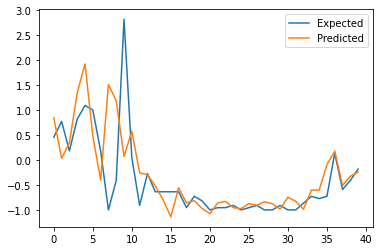

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.8,predicted=-0.3


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.1,predicted=-0.1
>expected=-0.4,predicted=0.7
>expected=-0.7,predicted=0.9
>expected=-1.1,predicted=-0.6
>expected=-0.7,predicted=-1.1
>expected=0.6,predicted=-0.9
>expected=-0.0,predicted=0.3
>expected=-0.3,predicted=0.0
>expected=-0.0,predicted=0.4
>expected=0.2,predicted=0.1
>expected=0.7,predicted=0.1
>expected=-0.0,predicted=0.2
>expected=-0.4,predicted=1.3
>expected=-0.2,predicted=-0.2
>expected=0.3,predicted=0.0
>expected=-0.3,predicted=0.2
>expected=-0.9,predicted=-0.3
>expected=-0.8,predicted=0.0
>expected=-1.1,predicted=-0.6
>expected=-1.1,predicted=-1.0
>expected=-1.2,predicted=-1.0
>expected=-1.3,predicted=-0.9
>expected=-1.3,predicted=-1.1
>expected=-0.9,predicted=-1.2
>expected=-1.2,predicted=-0.7
>expected=-0.9,predicted=-1.0
>expected=-0.6,predicted=-1.0
>expected=-0.9,predicted=-0.2
>expected=-0.7,predicted=-0.5
>expected=-0.8,predicted=-0.7
>expected=-0.6,predicted=-0.7
>expected=0.0,predicted=0.2
>expected=-0.8,predicted=-0.1
>expected=-0.9,predicted=-0.

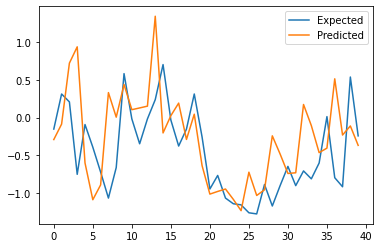

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.9,predicted=0.3
>expected=-0.5,predicted=-0.4


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.9,predicted=-0.7
>expected=-0.2,predicted=-0.9
>expected=-1.0,predicted=-0.2
>expected=0.8,predicted=-0.8
>expected=-1.0,predicted=0.5
>expected=-0.9,predicted=0.1
>expected=-0.9,predicted=-0.4
>expected=-0.8,predicted=-0.3
>expected=-0.9,predicted=-0.8
>expected=-0.8,predicted=-0.9
>expected=-0.7,predicted=-0.9
>expected=-1.0,predicted=-0.4
>expected=-0.7,predicted=-0.7
>expected=-0.8,predicted=-0.8
>expected=-0.2,predicted=-0.8
>expected=-1.0,predicted=-0.7
>expected=-1.0,predicted=0.5
>expected=-1.0,predicted=-0.4
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.9
>expected=-1.0,predicted=-0.7
>expected=-1.0,predicted=-1.0
>expected=-0.8,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-0.7,predicted=-0.9
>expected=-0.8,predicted=-0.8
>expected=-0.7,predicted=-0.7
>expected=0.2,predicted=-0.4
>expected=-0.4,predicted=-0.3
>expected=0.0,predicted=0.6
>expected=-0.8,predicted=-0.1
>expected=0.0,predicted=0.1
>expected=-0.4,predicted=-0.6
>expected=-0.9,pred

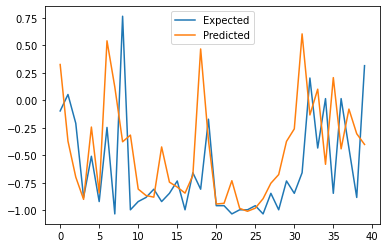

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=0.1,predicted=1.1
>expected=0.8,predicted=0.4


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.2,predicted=-0.1
>expected=-0.5,predicted=0.5
>expected=-0.7,predicted=0.4
>expected=-0.7,predicted=-0.7
>expected=0.8,predicted=0.1
>expected=0.5,predicted=-0.7
>expected=1.0,predicted=-0.4
>expected=-0.6,predicted=0.8
>expected=-0.1,predicted=0.9
>expected=-0.7,predicted=0.0
>expected=0.1,predicted=-0.9
>expected=-0.6,predicted=-0.1
>expected=-0.5,predicted=-0.6
>expected=-0.5,predicted=-0.7
>expected=-0.8,predicted=-0.4
>expected=-0.5,predicted=-0.7
>expected=-0.6,predicted=-0.5
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.2
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.6
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.8,predicted=-0.9
>expected=-0.5,predicted=-0.7
>expected=-0.7,predicted=-0.5
>expected=-0.1,predicted=-0.5
>expected=-0.5,predicted=0.1
>expected=-0.7,predicted=-0.8
>expected=-0.9,predicted=-0.2
>expected=-0.2,predic

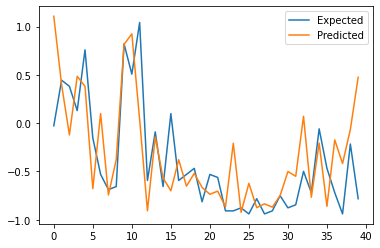

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.5,predicted=-0.6


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=-0.4,predicted=-0.2
>expected=-0.1,predicted=-0.4
>expected=-0.2,predicted=-0.2
>expected=-0.9,predicted=-0.1
>expected=-0.1,predicted=-0.3
>expected=1.5,predicted=0.3
>expected=-0.5,predicted=-0.3
>expected=0.7,predicted=0.1
>expected=-0.1,predicted=-0.1
>expected=-0.7,predicted=0.1
>expected=-0.6,predicted=0.8
>expected=-0.7,predicted=-0.1
>expected=-0.0,predicted=-0.8
>expected=0.5,predicted=-0.6
>expected=-0.5,predicted=0.4
>expected=-0.3,predicted=-0.4
>expected=-0.9,predicted=-0.3
>expected=-0.4,predicted=-0.2
>expected=-0.9,predicted=-0.6
>expected=-0.9,predicted=-1.1
>expected=-0.9,predicted=-0.4
>expected=-0.5,predicted=-0.8
>expected=-0.9,predicted=-0.3
>expected=-0.8,predicted=-0.8
>expected=-0.9,predicted=-0.8
>expected=-0.8,predicted=-0.7
>expected=-0.7,predicted=-0.8
>expected=-0.9,predicted=-0.5
>expected=-0.9,predicted=-0.9
>expected=0.0,predicted=-0.8
>expected=-0.7,predicted=-0.2
>expected=-0.7,predicted=-0.1
>expected=0.2,predicted=0.4
>expected=-0.5,predic

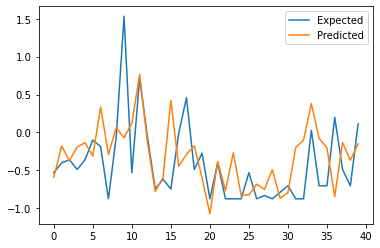

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.5,predicted=-0.4


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=1.3,predicted=-0.6
>expected=0.2,predicted=-0.1
>expected=-0.4,predicted=1.0
>expected=-0.7,predicted=0.4
>expected=2.8,predicted=-0.7
>expected=0.6,predicted=0.2
>expected=-0.1,predicted=0.3
>expected=-0.0,predicted=1.0
>expected=-0.0,predicted=0.6
>expected=-0.1,predicted=-0.1
>expected=-0.4,predicted=-0.2
>expected=-0.4,predicted=-0.3
>expected=-0.5,predicted=-0.1
>expected=-0.7,predicted=0.0
>expected=0.4,predicted=-0.6
>expected=1.1,predicted=-0.2
>expected=-0.4,predicted=0.7
>expected=-0.9,predicted=0.5
>expected=-0.7,predicted=0.4
>expected=-0.9,predicted=0.3
>expected=-0.8,predicted=-0.6
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-0.8
>expected=-0.7,predicted=-0.7
>expected=-0.9,predicted=-0.7
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-0.9,predicted=-0.8
>expected=-0.9,predicted=-0.7
>expected=-0.9,predicted=-0.8
>expected=0.3,predicted=-0.6
>expected=0.0,predicted=-0.7
>expected=-0.8,predicted=0.2


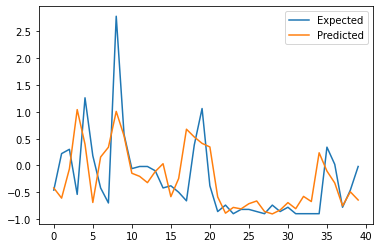

[[ 0.87510883  1.37678272 -0.19470517 ...  0.2614839   1.1402718
   2.18969992]
 [ 0.73090649  0.79281441 -0.19470517 ...  1.22214968  0.67298745
   0.27874613]
 [-0.06876106  0.30105162 -0.16753701 ... -0.17882125  0.52542398
   1.09772633]
 ...
 [-0.86842861 -0.83614983 -0.60222763 ... -0.89932059 -0.5813021
  -0.44923626]
 [-0.93397513 -0.34438704 -0.79240478 ... -0.85929284  1.04189614
  -0.81322746]
 [ 2.06805551  0.23958127  0.32148994 ... -0.45901544  1.5337744
   0.23324723]]
>expected=-0.0,predicted=0.7


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=0.3,predicted=0.3
>expected=-0.0,predicted=0.0
>expected=-0.8,predicted=0.0
>expected=-1.0,predicted=-0.1
>expected=1.2,predicted=-0.7
>expected=-0.2,predicted=-0.4
>expected=-0.5,predicted=0.1
>expected=-0.1,predicted=-0.5
>expected=-0.7,predicted=-1.0
>expected=-1.0,predicted=-0.3
>expected=-1.0,predicted=-0.1
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.7
>expected=-0.9,predicted=-0.7
>expected=-1.0,predicted=-0.9
>expected=-0.9,predicted=-1.0
>expected=-1.0,predicted=-1.0
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.9
>expected=-0.9,predicted=-0.9
>expected=-1.0,predicted=-0.8
>expected=-0.9,predicted=-0.9
>expected=-0.8,predicted=-0.9
>expected=-0.8,predicted=-0.9
>expected=-0.6,predicted=-0.9
>expected=-0.3,predicted=-0.3
>expected=-0.9,predicted=-0.5
>expected=-0.0,predicted=-0.7
>expected=-0.2,predicted=-0.8
>expected=-0.3,predicted=-0.4
>expected=-0.5,predicted=-0.2
>expected=-0.4,predicted=-0.6
>expected=-0.4,p

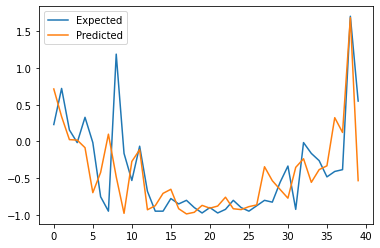

totalMSE 0.16001330951106355


In [39]:
# définir le modèle xgboost et faire une prédiction en une étape
def xgboost_forecast(train, testX):
    # transformer list par array
    train = np.asarray(train)

    # séparer into input et output colonnes
    trainX, trainy = train[:, :-1], train[:, -1]

     
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(trainX, trainy)

    # faire une one-step prédiction
    yhat = model.predict(np.asarray([testX]))
    return yhat[0]


# définir un walk-forwardvalidation pour les données univariées
def walk_forward_validation(data, n_test):
    predictions = list()

    # séparér l'apprentissage en deux parties train/text
    train, test = train_test_split(data, n_test)

    # créer une variable history avec training dataset
    history = [x for x in train]

    # sur chaque pas de test set
    for i in range(len(test)):
        # diviser la ligne de test en colonnes d'entrée et de sortie
        testX, testy = test[i, :-1], test[i, -1]

        # modèle d'ajustement sur history  
        yhat = xgboost_forecast(history, testX)

        # storer forecast dans la liste de prédictions
        predictions.append(yhat)

        # ajouter l'observation réelle à l'historique pour la boucle suivante
        history.append(test[i])

        # résumer les progrès
        print('>expected=%.1f,predicted=%.1f' % (testy, yhat))

    # estimaer les erreurs de la prédiction 
    error = mean_absolute_error(test[:, 1], predictions)
    return error, test[:, 1], predictions

totalMSE = 0

series =pd.read_csv('/Users/macbook/Desktop/pre_522days_train_data.csv', header=0, index_col=0)
preprocess = StandardScaler()
values = preprocess.fit_transform(series)
#print(values)


for country in range(0,19):
    print(values)
    value = values[:, country]

    # transformer des timeséries data aux supervised learning data
    data = series_to_supervised(value, n_in=4)

    # évaluer
    mae, y, yhat = walk_forward_validation(data, 40)
    # mae = mae + 5
    mse = 0
    for i in range(len(y)):
        mse = mse + (y[i] - yhat[i]) ** 2
        # print(mse)
    mse = mse / 100
    totalMSE = totalMSE + mse
    print('MAE: %.3f' % mae)
    print('MSE: %.3f' % mse)

    
    pyplot.plot(y, label='Expected')
    pyplot.plot(yhat, label='Predicted')
    pyplot.legend()
    pyplot.show()

totalMSE = totalMSE/20
print("totalMSE", totalMSE)

Le total MSE est 0.16,il est assez faible on peut donc considérer que ce modèle marche bien.